1. Boosting is an ensemble learning technique that improves predictive accuracy by combining multiple weak learners (typically decision trees). The key idea is to train models sequentially, where each new model corrects the errors made by the previous ones. Boosting focuses on misclassified examples, giving them higher weights so that the next model learns to handle them better.

2. While both Boosting and Bagging are ensemble techniques, they differ in their approach:

Bagging trains multiple models independently and aggregates their predictions (e.g., Random Forest).

Boosting builds models sequentially, where each model corrects the errors of the previous one.

Bagging reduces variance, while Boosting reduces bias and increases model complexity.

Boosting is more prone to overfitting compared to Bagging.

3. Adaptive Boosting (AdaBoost) is one of the first Boosting algorithms. Its core idea:

Assign equal weights to all samples initially.

Train a weak learner (usually a decision stump).

Increase weights for misclassified samples, making them more important in the next iteration.

Train new weak learners focusing more on hard-to-classify instances.

Combine all learners using weighted voting to form a strong classifier.

4. Consider a dataset where we classify emails as spam or not spam:

Train the first weak learner (a simple rule-based classifier).

If this classifier wrongly classifies some emails, increase their importance.

Train another weak learner focusing on misclassified emails.

Repeat for multiple iterations.

Final prediction is made by aggregating all models using weighted voting.

The result is an ensemble model that corrects its mistakes step by step, improving accuracy.

5. Gradient Boosting builds decision trees sequentially, but instead of adjusting weights like AdaBoost, it minimizes a loss function using gradient descent. Key differences:

AdaBoost modifies sample weights; Gradient Boosting minimizes errors using gradients.

Gradient Boosting is more flexible, allowing different loss functions.

Gradient Boosting often outperforms AdaBoost in complex datasets.

6. In Gradient Boosting, the loss function quantifies how far predictions are from actual values. The model minimizes this loss function using gradient descent. Common loss functions include:

Mean Squared Error (MSE): Used for regression tasks.

Log Loss (Binary Cross-Entropy): Used for classification.

Huber Loss: Handles outliers by blending MSE and Absolute Error.

Each new tree in Gradient Boosting tries to reduce the residual errors based on the gradient of the loss function.

7. XGBoost (Extreme Gradient Boosting) is an optimized version of Gradient Boosting with several improvements:

Regularization (L1 and L2) to prevent overfitting.

Parallel computation for faster training.

Handling missing values automatically.

Tree pruning to reduce unnecessary splits.

Early stopping to terminate training when performance stops improving.

XGBoost is widely used in competitions and real-world applications due to its efficiency and accuracy.

8. XGBoost and CatBoost are both powerful boosting algorithms, but they differ in how they handle categorical data:

XGBoost requires manual encoding (e.g., one-hot encoding).

CatBoost natively handles categorical features using special encoding techniques, making it more efficient for datasets with many categorical variables.

CatBoost is optimized for ordered boosting, reducing prediction bias.

For datasets rich in categorical data, CatBoost often outperforms XGBoost.

9. Boosting methods like XGBoost, AdaBoost, and CatBoost are widely used in real-world scenarios:

Fraud detection (Credit card transactions, cybersecurity).

Medical diagnosis (Predicting disease likelihood).

Customer churn prediction (Marketing applications).

Financial risk modeling (Loan default prediction).

Image recognition and NLP (Boosting models enhance deep learning).

Recommendation systems (Personalized product suggestions).

10. Regularization in XGBoost prevents overfitting by adding penalty terms to the objective function:

L1 Regularization (Lasso) shrinks some coefficients to zero, promoting sparsity.

L2 Regularization (Ridge) reduces the magnitude of coefficients, making the model more stable.

By controlling model complexity, regularization ensures better generalization to unseen data.

11. Gradient Boosting models offer several hyperparameters for optimization:

Learning Rate (η): Controls how much each new tree contributes to the final prediction.

Number of Estimators (n_estimators): Defines the number of boosting iterations (trees).

Max Depth: Limits the depth of each tree, controlling complexity.

Subsample Ratio: Determines the proportion of training data used for each boosting stage.

Regularization Parameters (L1, L2): Helps prevent overfitting by adding penalties to tree weights.

Tuning these hyperparameters via grid search or Bayesian optimization improves model performance.

12. Boosting models assess the significance of features based on their contribution to decision-making. Feature importance metrics include:

Gain: Measures the total contribution of a feature to reducing loss.

Frequency: Counts how often a feature is used for splitting.

Cover: Considers the number of observations affected by a feature split.

Feature importance helps in feature selection by removing irrelevant variables and improving interpretability.

13.CatBoost is specifically designed for categorical feature handling, making it more efficient than traditional boosting methods. Key advantages:

Ordered Boosting: Ensures unbiased splits by processing data in a specific order.

Categorical Encoding: Automatically handles categorical features without needing one-hot encoding.

Efficient GPU Computation: Optimized algorithms ensure faster training on large datasets.

This makes CatBoost ideal for datasets with many categorical variables, reducing preprocessing effort.

In [1]:
# prompt: Train an AdaBoost Classifier on a sample dataset and print model accuracy

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a sample dataset
# Using make_classification to create a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost Classifier
# Using default parameters for simplicity
adaboost = AdaBoostClassifier(random_state=42)

# Train the model
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the model accuracy
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

AdaBoost Classifier Accuracy: 0.8367


In [2]:
# prompt:  Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.datasets import make_regression

# Generate a sample regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Create an AdaBoost Regressor
adaboost_reg = AdaBoostRegressor(random_state=42)

# Train the regressor model
adaboost_reg.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = adaboost_reg.predict(X_test_reg)

# Evaluate performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_reg, y_pred_reg)

# Print the Mean Absolute Error
print(f"AdaBoost Regressor Mean Absolute Error (MAE): {mae:.4f}")


AdaBoost Regressor Mean Absolute Error (MAE): 107.5777


In [3]:
# prompt:  Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Print feature importance
feature_importance = gbm.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\nGradient Boosting Classifier Feature Importance:")
feature_importance_df


Gradient Boosting Classifier Feature Importance:


,feature,importance
7,mean concave points,0.434897
27,worst concave points,0.273841
22,worst perimeter,0.050974
23,worst area,0.047995
21,worst texture,0.047193
20,worst radius,0.045435
26,worst concavity,0.022999
1,mean texture,0.018393
16,concavity error,0.015558
10,radius error,0.010003


In [4]:
# prompt: Train a Gradient Boosting Regressor and evaluate using R-Squared Score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Create a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the regressor model using the regression dataset
gbr.fit(X_train_reg, y_train_reg)

# Make predictions on the test set for regression
y_pred_gbr = gbr.predict(X_test_reg)

# Evaluate performance using R-squared score
r2 = r2_score(y_test_reg, y_pred_gbr)

# Print the R-squared score
print(f"\nGradient Boosting Regressor R-squared (R2) Score: {r2:.4f}")


Gradient Boosting Regressor R-squared (R2) Score: 0.8099


In [5]:
# prompt:  Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

!pip install xgboost

from xgboost import XGBClassifier

# Create an XGBoost Classifier
# Using default parameters for simplicity
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model
xgb.fit(X_train, y_train)

# Make predictions on the test set with XGBoost
y_pred_xgb = xgb.predict(X_test)

# Calculate the accuracy of the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the XGBoost model accuracy
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")

# Make predictions on the test set with Gradient Boosting Classifier
y_pred_gbm = gbm.predict(X_test)

# Calculate the accuracy of the Gradient Boosting Classifier model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

# Print the Gradient Boosting Classifier accuracy
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gbm:.4f}")

XGBoost Classifier Accuracy: 0.9708
Gradient Boosting Classifier Accuracy: 0.9591


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:28:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [6]:
# prompt: Train a CatBoost Classifier and evaluate using F1-Score

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Create a CatBoost Classifier
# Using default parameters for simplicity
# Set verbose to False to avoid printing training information
catboost = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Train the CatBoost model
catboost.fit(X_train, y_train)

# Make predictions on the test set with CatBoost
y_pred_catboost = catboost.predict(X_test)

# Evaluate performance using F1-Score
f1 = f1_score(y_test, y_pred_catboost)

# Print the CatBoost F1-Score
print(f"CatBoost Classifier F1-Score: {f1:.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00
CatBoost Classifier F1-Score: 0.9772


In [7]:
# prompt:  Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Create an XGBoost Regressor
# Using default parameters for simplicity
# The 'objective' parameter is automatically set to 'reg:squarederror' for regression
xgb_reg = XGBRegressor(random_state=42)

# Train the XGBoost Regressor model using the regression dataset
xgb_reg.fit(X_train_reg, y_train_reg)

# Make predictions on the test set for regression
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)

# Evaluate performance using Mean Squared Error (MSE)
mse_xgb_reg = mean_squared_error(y_test_reg, y_pred_xgb_reg)

# Print the Mean Squared Error
print(f"XGBoost Regressor Mean Squared Error (MSE): {mse_xgb_reg:.4f}")

XGBoost Regressor Mean Squared Error (MSE): 14141.9047



AdaBoost Classifier Feature Importance (Breast Cancer Dataset):
                    feature  importance
7       mean concave points    0.113660
23               worst area    0.108732
27     worst concave points    0.090356
21            worst texture    0.082925
1              mean texture    0.071518
26          worst concavity    0.067538
15        compactness error    0.062799
28           worst symmetry    0.058467
13               area error    0.057225
24         worst smoothness    0.046415
8             mean symmetry    0.041431
19  fractal dimension error    0.038758
5          mean compactness    0.034902
10             radius error    0.034010
18           symmetry error    0.021461
4           mean smoothness    0.019510
17     concave points error    0.017063
3                 mean area    0.013337
22          worst perimeter    0.010443
12          perimeter error    0.009452
0               mean radius    0.000000
2            mean perimeter    0.000000
11            t

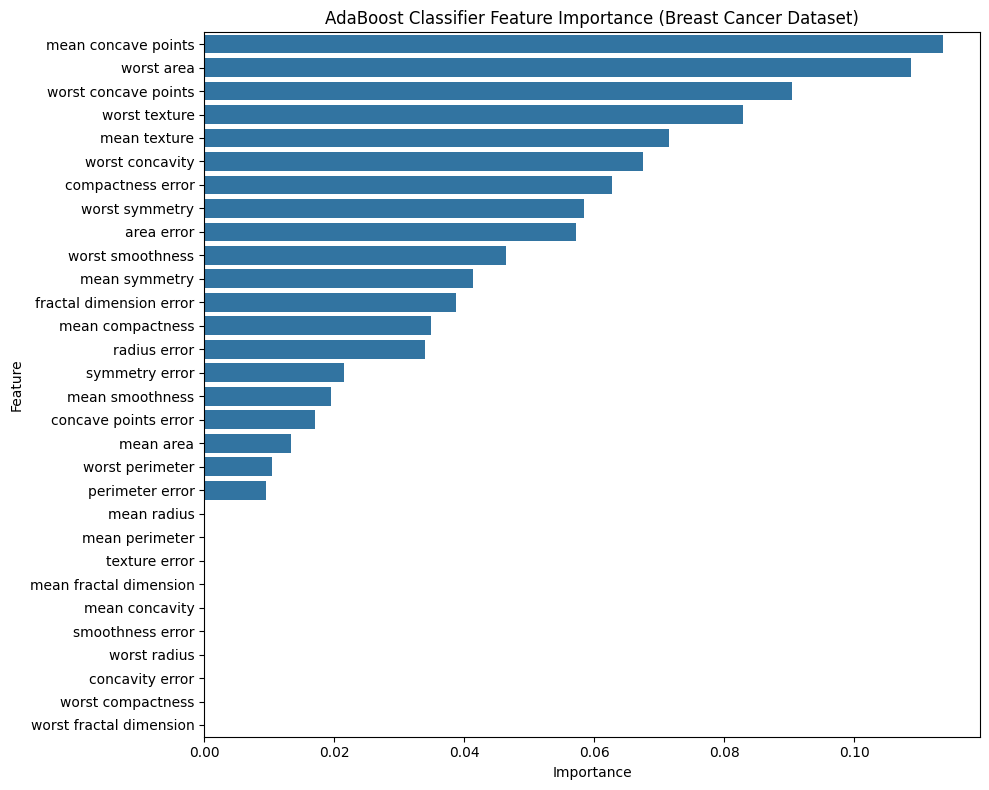

In [9]:
# prompt: Train an AdaBoost Classifier and visualize feature importance

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas as it was not imported in this specific cell

# Load the Breast Cancer dataset again if needed, or ensure X and y are
# the Breast Cancer data from the previous cell
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# Re-split the Breast Cancer dataset for AdaBoost visualization if needed
# (or ensure X_train and X_test refer to the breast cancer data)
from sklearn.model_selection import train_test_split
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a *new* AdaBoost Classifier and train it on the Breast Cancer data
from sklearn.ensemble import AdaBoostClassifier
adaboost_bc = AdaBoostClassifier(random_state=42)
adaboost_bc.fit(X_train_bc, y_train_bc)


# Get feature importances from the AdaBoost Classifier trained on Breast Cancer data
feature_importance_ada = adaboost_bc.feature_importances_

# Create a DataFrame for visualization using the feature names from the Breast Cancer dataset
feature_importance_ada_df = pd.DataFrame({'feature': feature_names, # Use feature_names from the Breast Cancer dataset
                                        'importance': feature_importance_ada})
feature_importance_ada_df = feature_importance_ada_df.sort_values('importance', ascending=False)

# Print AdaBoost Feature Importance
print("\nAdaBoost Classifier Feature Importance (Breast Cancer Dataset):")
print(feature_importance_ada_df)

# Visualize feature importance
plt.figure(figsize=(10, 8)) # Increased figure size for better readability with more features
sns.barplot(x='importance', y='feature', data=feature_importance_ada_df)
plt.title('AdaBoost Classifier Feature Importance (Breast Cancer Dataset)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

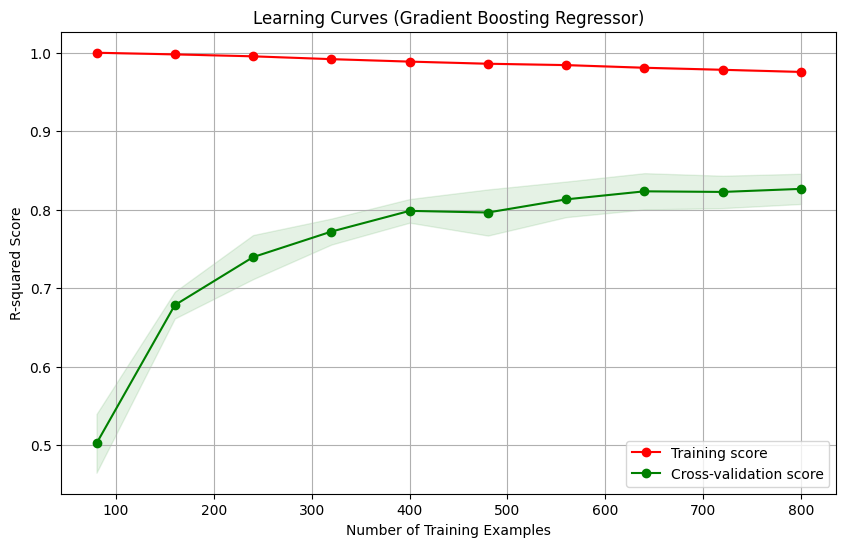

In [10]:
# prompt: Train a Gradient Boosting Regressor and plot learning curves

import numpy as np
from sklearn.model_selection import learning_curve

# Create a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Generate learning curves
# train_sizes will be the number of training examples
# train_scores and test_scores will be the R-squared scores
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X_reg, y_reg, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2')

# Calculate mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Gradient Boosting Regressor)")
plt.xlabel("Number of Training Examples")
plt.ylabel("R-squared Score")
plt.grid()

# Plot training scores with shaded area for standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")

# Plot cross-validation scores with shaded area for standard deviation
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


XGBoost Classifier Feature Importance (Breast Cancer Dataset):
                    feature  importance
7       mean concave points    0.495485
27     worst concave points    0.108320
22          worst perimeter    0.100045
20             worst radius    0.046132
21            worst texture    0.027050
23               worst area    0.026614
26          worst concavity    0.025580
10             radius error    0.024870
12          perimeter error    0.022448
16          concavity error    0.021031
8             mean symmetry    0.018199
1              mean texture    0.015394
29  worst fractal dimension    0.013090
19  fractal dimension error    0.009508
13               area error    0.008133
24         worst smoothness    0.006690
14         smoothness error    0.005246
11            texture error    0.004868
15        compactness error    0.004390
5          mean compactness    0.004257
28           worst symmetry    0.003047
9    mean fractal dimension    0.002247
4           mean

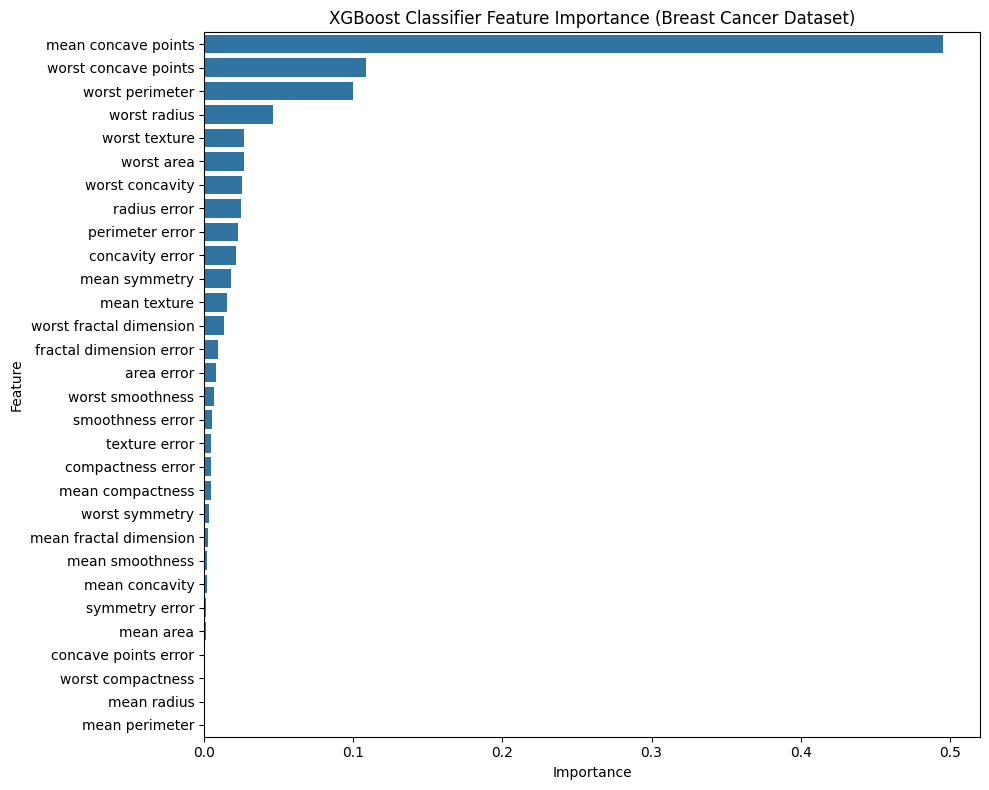

In [11]:
# prompt: Train an XGBoost Classifier and visualize feature importance

# Train an XGBoost Classifier using the Breast Cancer dataset
# The XGBoost classifier 'xgb' is already trained on the Breast Cancer dataset in the preceding code.

# Get feature importances from the trained XGBoost Classifier
feature_importance_xgb = xgb.feature_importances_

# Create a DataFrame for visualization using the feature names from the Breast Cancer dataset
feature_importance_xgb_df = pd.DataFrame({'feature': feature_names, # Use feature_names from the Breast Cancer dataset
                                        'importance': feature_importance_xgb})
feature_importance_xgb_df = feature_importance_xgb_df.sort_values('importance', ascending=False)

# Print XGBoost Feature Importance
print("\nXGBoost Classifier Feature Importance (Breast Cancer Dataset):")
print(feature_importance_xgb_df)

# Visualize feature importance
plt.figure(figsize=(10, 8)) # Increased figure size for better readability with more features
sns.barplot(x='importance', y='feature', data=feature_importance_xgb_df)
plt.title('XGBoost Classifier Feature Importance (Breast Cancer Dataset)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


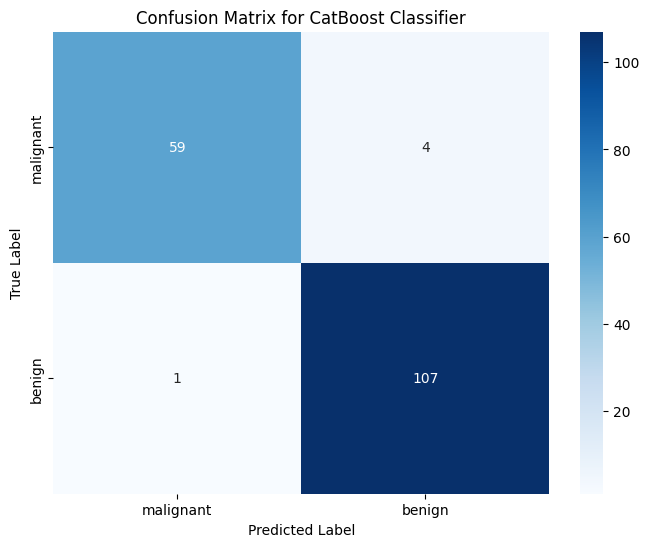

In [12]:
# prompt:  Train a CatBoost Classifier and plot the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `catboost` is the trained CatBoostClassifier from the previous cell
# and `X_test` and `y_test` are the test features and labels from the Breast Cancer dataset

# Make predictions on the test set
y_pred_catboost = catboost.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_catboost)

# Plot the confusion matrix
# Get the class names from the dataset
class_names = breast_cancer.target_names # Assuming 'breast_cancer' is loaded and available

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

AdaBoost Classifier (n_estimators=50) Accuracy: 0.9708
AdaBoost Classifier (n_estimators=100) Accuracy: 0.9708
AdaBoost Classifier (n_estimators=200) Accuracy: 0.9825
AdaBoost Classifier (n_estimators=500) Accuracy: 0.9883

Accuracy comparison:
n_estimators=50: 0.9708
n_estimators=100: 0.9708
n_estimators=200: 0.9825
n_estimators=500: 0.9883


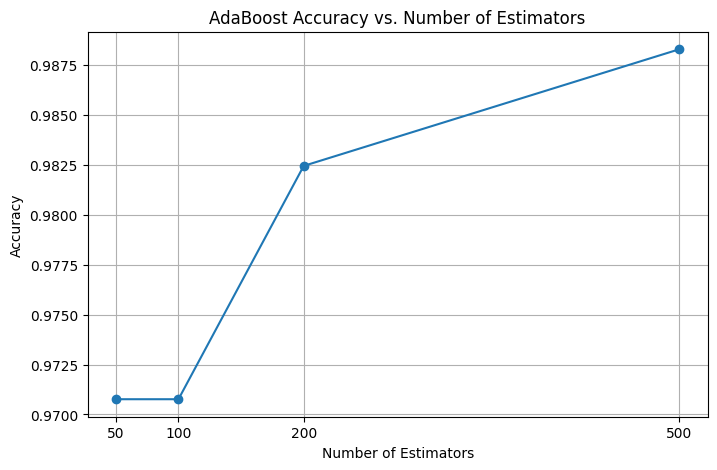

In [13]:
# prompt: Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

from sklearn.metrics import confusion_matrix

# Generate a sample dataset (assuming this is the Breast Cancer dataset used in previous cells)
# If not already loaded, load it again:
# from sklearn.datasets import load_breast_cancer
# breast_cancer = load_breast_cancer()
# X = breast_cancer.data
# y = breast_cancer.target

# Assuming X and y are already split into X_train, X_test, y_train, y_test from previous cells
# If not, split the data:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the number of estimators to try
n_estimators_list = [50, 100, 200, 500]

# Dictionary to store accuracy scores for each number of estimators
accuracy_scores = {}

# Train AdaBoost Classifier with different numbers of estimators
for n_estimators in n_estimators_list:
  # Create an AdaBoost Classifier with the current number of estimators
  adaboost = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)

  # Train the model
  adaboost.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = adaboost.predict(X_test)

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_test, y_pred)

  # Store the accuracy
  accuracy_scores[n_estimators] = accuracy

  # Print the accuracy for the current number of estimators
  print(f"AdaBoost Classifier (n_estimators={n_estimators}) Accuracy: {accuracy:.4f}")

# Compare the accuracy scores
print("\nAccuracy comparison:")
for n_estimators, accuracy in accuracy_scores.items():
  print(f"n_estimators={n_estimators}: {accuracy:.4f}")

# Optional: Visualize the accuracy vs number of estimators
plt.figure(figsize=(8, 5))
plt.plot(list(accuracy_scores.keys()), list(accuracy_scores.values()), marker='o')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()

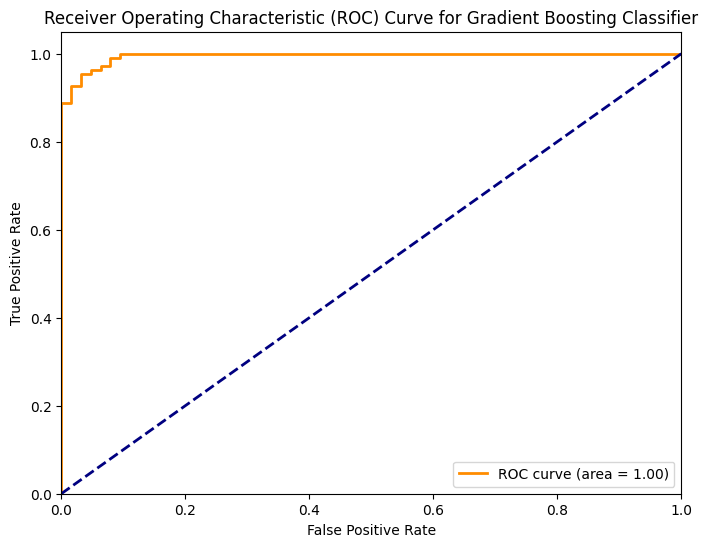

In [14]:
# prompt:  Train a Gradient Boosting Classifier and visualize the ROC curve'

from sklearn.metrics import roc_curve, auc

# Assuming `gbm` is the trained Gradient Boosting Classifier from the preceding code
# and `X_test`, `y_test` are the test features and labels for the Breast Cancer dataset

# Get the probability of the positive class
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob_gbm)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found by GridSearchCV:
{'learning_rate': 0.1}
XGBoost Regressor (Tuned) Mean Squared Error (MSE): 12839.2933


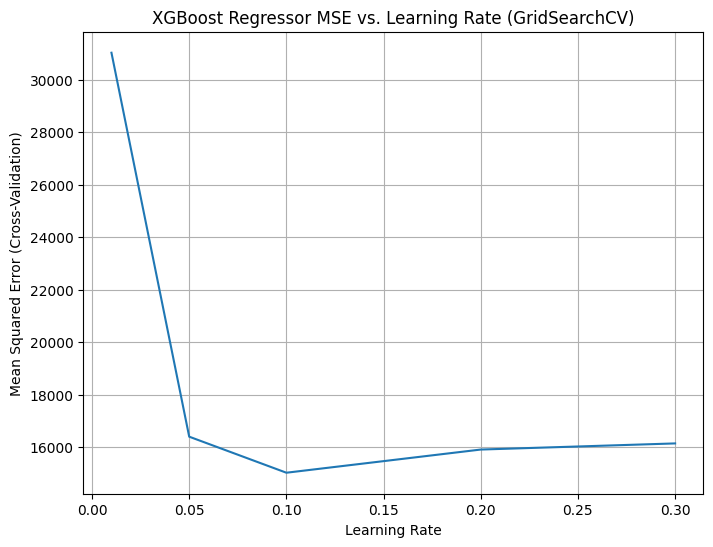

In [15]:
# prompt:  Train an XGBoost Regressor and tune the learning rate using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Generate a sample regression dataset if not already available
# This dataset will be used for the XGBoost Regressor
# from sklearn.datasets import make_regression
# X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=42)

# Split the dataset into training and testing sets for regression if not already split
# from sklearn.model_selection import train_test_split
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


# Create an XGBoost Regressor
xgb_reg_gs = XGBRegressor(random_state=42)

# Define the parameter grid to tune the learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Create GridSearchCV object
# cv=5 specifies 5-fold cross-validation
# scoring='neg_mean_squared_error' is used because GridSearchCV maximizes the score; we minimize MSE
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(estimator=xgb_reg_gs, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train_reg, y_train_reg)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Get the best estimator (the model with the best learning rate)
best_xgb_reg = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_xgb_reg = best_xgb_reg.predict(X_test_reg)

# Evaluate the best model using Mean Squared Error (MSE)
mse_best_xgb_reg = mean_squared_error(y_test_reg, y_pred_best_xgb_reg)

# Print the Mean Squared Error of the best model
print(f"XGBoost Regressor (Tuned) Mean Squared Error (MSE): {mse_best_xgb_reg:.4f}")

# Optional: Visualize the results of the grid search
results = grid_search.cv_results_
plt.figure(figsize=(8, 6))
plt.plot(param_grid['learning_rate'], -results['mean_test_score']) # Plot negative MSE (actual MSE)
plt.title('XGBoost Regressor MSE vs. Learning Rate (GridSearchCV)')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (Cross-Validation)')
plt.grid(True)
plt.show()

Training data shape: (700, 20), Labels shape: (700,)
Testing data shape: (300, 20), Labels shape: (300,)
Class distribution in training set: [614  86]
Class distribution in test set: [267  33]

CatBoost Classifier (No Class Weights) F1-Score: 0.3810

Calculated class weights: {0: 1.0, 1: np.float64(7.1395348837209305)}
CatBoost Classifier (With Class Weights) F1-Score: 0.5000

Performance Comparison on Imbalanced Dataset:
F1-Score without class weights: 0.3810
F1-Score with class weights:    0.5000


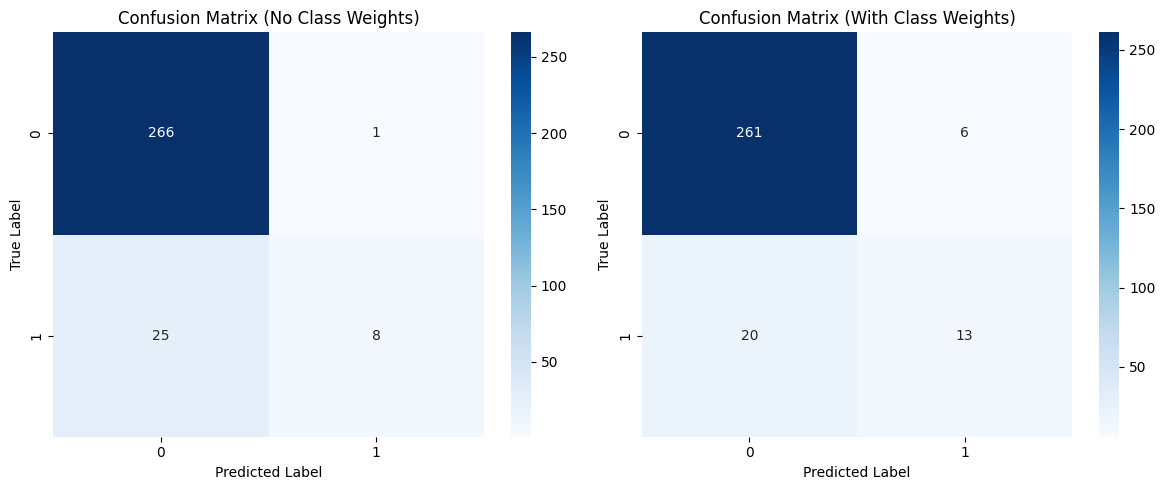

In [16]:
# prompt: Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

# Generate an imbalanced dataset
from sklearn.datasets import make_classification
X_imb, y_imb = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
                           weights=[0.9, 0.1], flip_y=0.05, random_state=42) # 90% class 0, 10% class 1

# Split the imbalanced dataset
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.3, random_state=42)

print(f"Training data shape: {X_train_imb.shape}, Labels shape: {y_train_imb.shape}")
print(f"Testing data shape: {X_test_imb.shape}, Labels shape: {y_test_imb.shape}")
print(f"Class distribution in training set: {np.bincount(y_train_imb)}")
print(f"Class distribution in test set: {np.bincount(y_test_imb)}")


# Train CatBoost without class weights
catboost_no_weights = CatBoostClassifier(iterations=100, random_state=42, verbose=False)
catboost_no_weights.fit(X_train_imb, y_train_imb)
y_pred_no_weights = catboost_no_weights.predict(X_test_imb)

# Evaluate performance without class weights
f1_no_weights = f1_score(y_test_imb, y_pred_no_weights)
print(f"\nCatBoost Classifier (No Class Weights) F1-Score: {f1_no_weights:.4f}")

# Calculate class weights
# The total number of samples is 1000
# Class 0 has ~900 samples, Class 1 has ~100 samples
# A common approach is to use n_samples / (n_classes * n_samples_in_class)
# For binary classification and simple ratio: count(majority) / count(minority)
# or {class_id: weight}
class_counts = np.bincount(y_train_imb)
class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]} # Weight for minority class

print(f"\nCalculated class weights: {class_weights}")


# Train CatBoost with class weights
catboost_with_weights = CatBoostClassifier(iterations=100, random_state=42, verbose=False, class_weights=class_weights)
catboost_with_weights.fit(X_train_imb, y_train_imb)
y_pred_with_weights = catboost_with_weights.predict(X_test_imb)

# Evaluate performance with class weights
f1_with_weights = f1_score(y_test_imb, y_pred_with_weights)
print(f"CatBoost Classifier (With Class Weights) F1-Score: {f1_with_weights:.4f}")

# Compare F1-scores
print("\nPerformance Comparison on Imbalanced Dataset:")
print(f"F1-Score without class weights: {f1_no_weights:.4f}")
print(f"F1-Score with class weights:    {f1_with_weights:.4f}")

# Optional: Visualize confusion matrices
cm_no_weights = confusion_matrix(y_test_imb, y_pred_no_weights)
cm_with_weights = confusion_matrix(y_test_imb, y_pred_with_weights)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_no_weights, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (No Class Weights)')

plt.subplot(1, 2, 2)
sns.heatmap(cm_with_weights, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (With Class Weights)')

plt.tight_layout()
plt.show()


AdaBoost Classifier (learning_rate=0.01) Accuracy: 0.9474
AdaBoost Classifier (learning_rate=0.05) Accuracy: 0.9591
AdaBoost Classifier (learning_rate=0.10) Accuracy: 0.9591
AdaBoost Classifier (learning_rate=0.20) Accuracy: 0.9649
AdaBoost Classifier (learning_rate=0.30) Accuracy: 0.9591
AdaBoost Classifier (learning_rate=0.50) Accuracy: 0.9649
AdaBoost Classifier (learning_rate=1.00) Accuracy: 0.9708


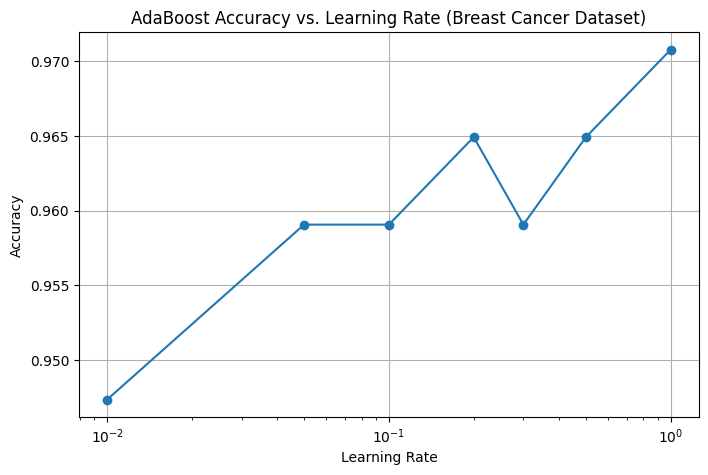

In [17]:
# prompt: Train an AdaBoost Classifier and analyze the effect of different learning rates

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# Re-split the Breast Cancer dataset for AdaBoost visualization if needed
# (or ensure X_train and X_test refer to the breast cancer data)
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, test_size=0.3, random_state=42)


# Define a range of learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0]
accuracies = []

# Train AdaBoost Classifier with different learning rates
for lr in learning_rates:
  # Create an AdaBoost Classifier with the current learning rate
  # Use a fixed number of estimators for comparison
  adaboost_lr = AdaBoostClassifier(learning_rate=lr, n_estimators=100, random_state=42)

  # Train the model on the Breast Cancer training data
  adaboost_lr.fit(X_train_bc, y_train_bc)

  # Make predictions on the Breast Cancer test data
  y_pred_lr = adaboost_lr.predict(X_test_bc)

  # Calculate the accuracy
  accuracy_lr = accuracy_score(y_test_bc, y_pred_lr)
  accuracies.append(accuracy_lr)

  # Print the accuracy for the current learning rate
  print(f"AdaBoost Classifier (learning_rate={lr:.2f}) Accuracy: {accuracy_lr:.4f}")

# Visualize the effect of learning rate on accuracy
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o')
plt.title('AdaBoost Accuracy vs. Learning Rate (Breast Cancer Dataset)')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log') # Use a log scale for the x-axis if the learning rates vary widely
plt.grid(True)
plt.show()

In [18]:
# prompt: Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris # Load a multi-class dataset
import numpy as np

# Load a multi-class dataset (e.g., Iris)
iris = load_iris()
X_mc = iris.data
y_mc = iris.target

# Split the dataset into training and testing sets
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc, y_mc, test_size=0.3, random_state=42)

# Create an XGBoost Classifier for multi-class classification
# Set 'objective' to 'multi:softprob' for probability outputs
# Set 'eval_metric' to 'mlogloss' for multi-class log loss
xgb_mc = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', use_label_encoder=False, num_class=len(np.unique(y_mc)), random_state=42)

# Train the XGBoost model
xgb_mc.fit(X_train_mc, y_train_mc)

# Make probability predictions on the test set
y_pred_proba_mc = xgb_mc.predict_proba(X_test_mc)

# Evaluate performance using log-loss
# log_loss requires true labels and predicted probabilities
logloss_mc = log_loss(y_test_mc, y_pred_proba_mc)

# Print the log-loss
print(f"\nXGBoost Classifier Multi-class Log-Loss: {logloss_mc:.4f}")




XGBoost Classifier Multi-class Log-Loss: 0.0100


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:35:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
